# Understanding Over & Underfitting
## Predicting Boston Housing Prices

## Getting Started
In this project, you will use the Boston Housing Prices dataset to build several models to predict the prices of homes with particular qualities from the suburbs of Boston, MA.
We will build models with several different parameters, which will change the goodness of fit for each. 

---
## Data Exploration
Since we want to predict the value of houses, the **target variable**, `'MEDV'`, will be the variable we seek to predict.

### Import and explore the data. Clean the data for outliers and missing values. 

In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split

from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor

from sklearn.metrics import r2_score

In [2]:
# Your code here
boston_df = pd.read_csv('../data/boston_data.csv')
boston_df.head()

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,black,lstat,medv
0,0.15876,0.0,10.81,0.0,0.413,5.961,17.5,5.2873,4.0,305.0,19.2,376.94,9.88,21.7
1,0.10328,25.0,5.13,0.0,0.453,5.927,47.2,6.9320,8.0,284.0,19.7,396.90,9.22,19.6
2,0.34940,0.0,9.90,0.0,0.544,5.972,76.7,3.1025,4.0,304.0,18.4,396.24,9.97,20.3
3,2.73397,0.0,19.58,0.0,0.871,5.597,94.9,1.5257,5.0,403.0,14.7,351.85,21.45,15.4
4,0.04337,21.0,5.64,0.0,0.439,6.115,63.0,6.8147,4.0,243.0,16.8,393.97,9.43,20.5


In [3]:
boston_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 404 entries, 0 to 403
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   crim     404 non-null    float64
 1   zn       404 non-null    float64
 2   indus    404 non-null    float64
 3   chas     404 non-null    float64
 4   nox      404 non-null    float64
 5   rm       404 non-null    float64
 6   age      404 non-null    float64
 7   dis      404 non-null    float64
 8   rad      404 non-null    float64
 9   tax      404 non-null    float64
 10  ptratio  404 non-null    float64
 11  black    404 non-null    float64
 12  lstat    404 non-null    float64
 13  medv     404 non-null    float64
dtypes: float64(14)
memory usage: 44.3 KB


In [4]:
boston_df.describe()

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,black,lstat,medv
count,404.000000,404.000000,404.000000,404.000000,404.000000,404.00000,404.000000,404.000000,404.000000,404.000000,404.000000,404.000000,404.000000,404.000000
mean,3.730912,10.509901,11.189901,0.069307,0.556710,6.30145,68.601733,3.799666,9.836634,411.688119,18.444554,355.068243,12.598936,22.312376
std,8.943922,22.053733,6.814909,0.254290,0.117321,0.67583,28.066143,2.109916,8.834741,171.073553,2.150295,94.489572,6.925173,8.837019
min,0.006320,0.000000,0.460000,0.000000,0.392000,3.56100,2.900000,1.169100,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.082382,0.000000,5.190000,0.000000,0.453000,5.90275,45.800000,2.087875,4.000000,281.000000,17.375000,374.710000,7.135000,17.100000
50%,0.253715,0.000000,9.795000,0.000000,0.538000,6.23050,76.600000,3.207450,5.000000,330.000000,19.000000,391.065000,11.265000,21.400000
75%,4.053158,12.500000,18.100000,0.000000,0.631000,6.62925,94.150000,5.222125,24.000000,666.000000,20.200000,396.007500,16.910000,25.000000
max,88.976200,95.000000,27.740000,1.000000,0.871000,8.78000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,34.370000,50.000000


In [5]:
boston_df.columns

Index(['crim', 'zn', 'indus', 'chas', 'nox', 'rm', 'age', 'dis', 'rad', 'tax',
       'ptratio', 'black', 'lstat', 'medv'],
      dtype='object')

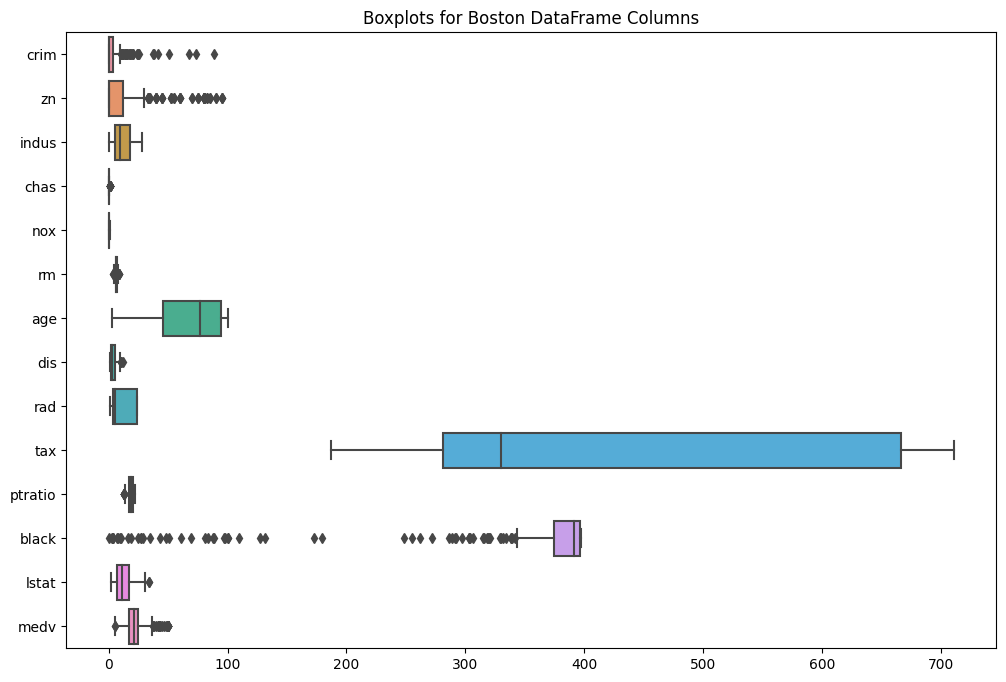

In [6]:
plt.figure(figsize=(12, 8))
sns.boxplot(data=boston_df, orient = 'h')
plt.title('Boxplots for Boston DataFrame Columns')
plt.show()


In [7]:
boston_df.chas.value_counts()

0.0    376
1.0     28
Name: chas, dtype: int64

In [8]:
columns_to_clean = list(boston_df.columns)
columns_to_clean.remove('chas')
columns_to_clean.remove('indus')
columns_to_clean.remove('nox')
columns_to_clean.remove('rm')
columns_to_clean.remove('age')
columns_to_clean.remove('rad')
columns_to_clean.remove('tax')
columns_to_clean

['crim', 'zn', 'dis', 'ptratio', 'black', 'lstat', 'medv']

In [9]:
for column in columns_to_clean:
    Q1 = np.percentile(boston_df[column], 25)
    Q3 = np.percentile(boston_df[column], 75)

    IQR = Q3 - Q1

    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    boston_df = boston_df.loc[(boston_df[column] >= lower_bound) & (boston_df[column] <= upper_bound)].reset_index()
    boston_df.drop(['index'], axis = 1, inplace = True)

In [10]:
boston_df.describe()

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,black,lstat,medv
count,239.000000,239.000000,239.000000,239.000000,239.000000,239.000000,239.000000,239.000000,239.000000,239.000000,239.000000,239.000000,239.000000,239.000000
mean,1.321566,5.445607,10.535983,0.075314,0.534494,6.223628,65.574895,3.968914,7.983264,373.698745,18.726778,389.195565,11.548285,21.788285
std,2.488645,11.277216,6.094660,0.264451,0.098914,0.466885,26.471935,1.671327,7.549259,151.043490,1.717469,10.357342,4.763735,4.498836
min,0.006320,0.000000,1.520000,0.000000,0.409000,3.561000,2.900000,1.358000,1.000000,188.000000,14.700000,350.450000,3.590000,11.300000
25%,0.084170,0.000000,5.910000,0.000000,0.451000,5.930000,45.600000,2.546550,4.000000,279.000000,17.800000,386.720000,7.715000,19.300000
50%,0.164390,0.000000,8.560000,0.000000,0.515000,6.195000,69.500000,3.665900,5.000000,307.000000,19.000000,393.300000,10.500000,21.700000
75%,0.698855,0.000000,18.100000,0.000000,0.576500,6.481500,89.850000,5.250950,7.000000,403.000000,20.200000,396.660000,14.480000,24.050000
max,9.966540,45.000000,27.740000,1.000000,0.871000,8.780000,100.000000,8.055500,24.000000,711.000000,21.200000,396.900000,25.410000,33.200000


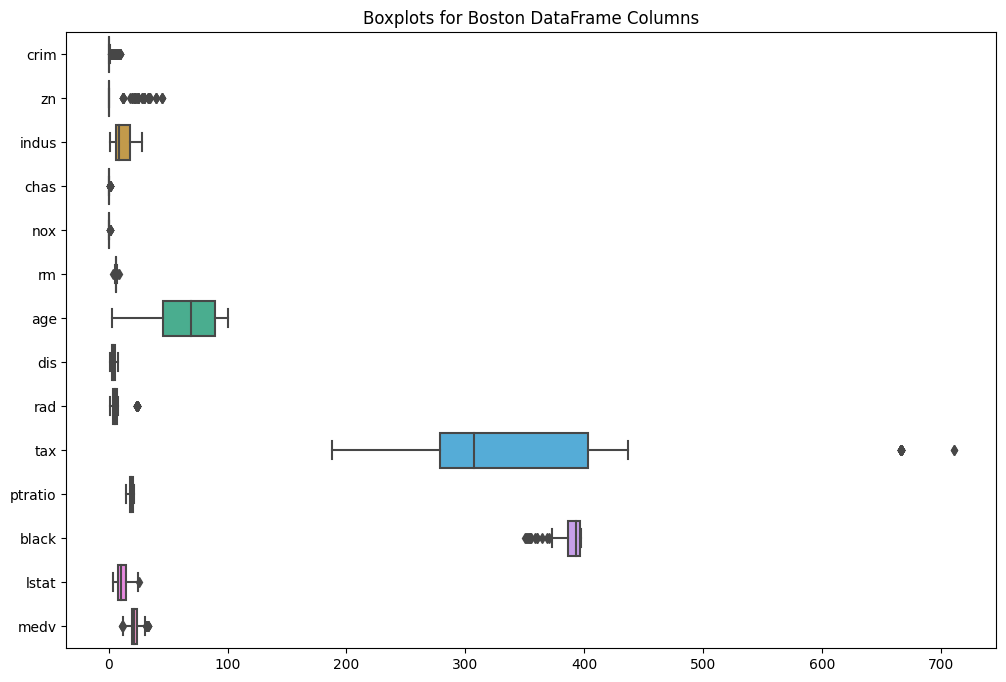

In [11]:
plt.figure(figsize=(12, 8))
sns.boxplot(data=boston_df, orient = 'h')
plt.title('Boxplots for Boston DataFrame Columns')
plt.show()

In [12]:
'''Here we see that even if we removed outliers, we still have outliers. 
It is normal : When we remove a row with a outlier in a column, this affect the range of value in all the others columns. That is why we still have outliers. 
But now we can see that there are much less, and looking at the output of describe function, we see eomething muh more consistent.'''

'Here we see that even if we removed outliers, we still have outliers. \nIt is normal : When we remove a row with a outlier in a column, this affect the range of value in all the others columns. That is why we still have outliers. \nBut now we can see that there are much less, and looking at the output of describe function, we see eomething muh more consistent.'

### Next, we want to explore the data. Pick several varibables you think will be ost correlated with the prices of homes in Boston, and create plots that show the data dispersion as well as the regression line of best fit.

In [13]:
# Your plots here
def my_correlation(df_numerical):
    
    #Correlation matrix:
    correlation = np.abs(df_numerical.corr())

    #Only the lower triange
    mask = np.zeros_like(correlation, dtype=bool)
    mask[np.triu_indices_from(mask)] = True
    
    #Setting size of the figure
    plt.subplots(figsize=(14, 14))

    #Plotting
    sns.heatmap(correlation, mask=mask,annot = True, cmap = 'RdYlGn')
    plt.show()

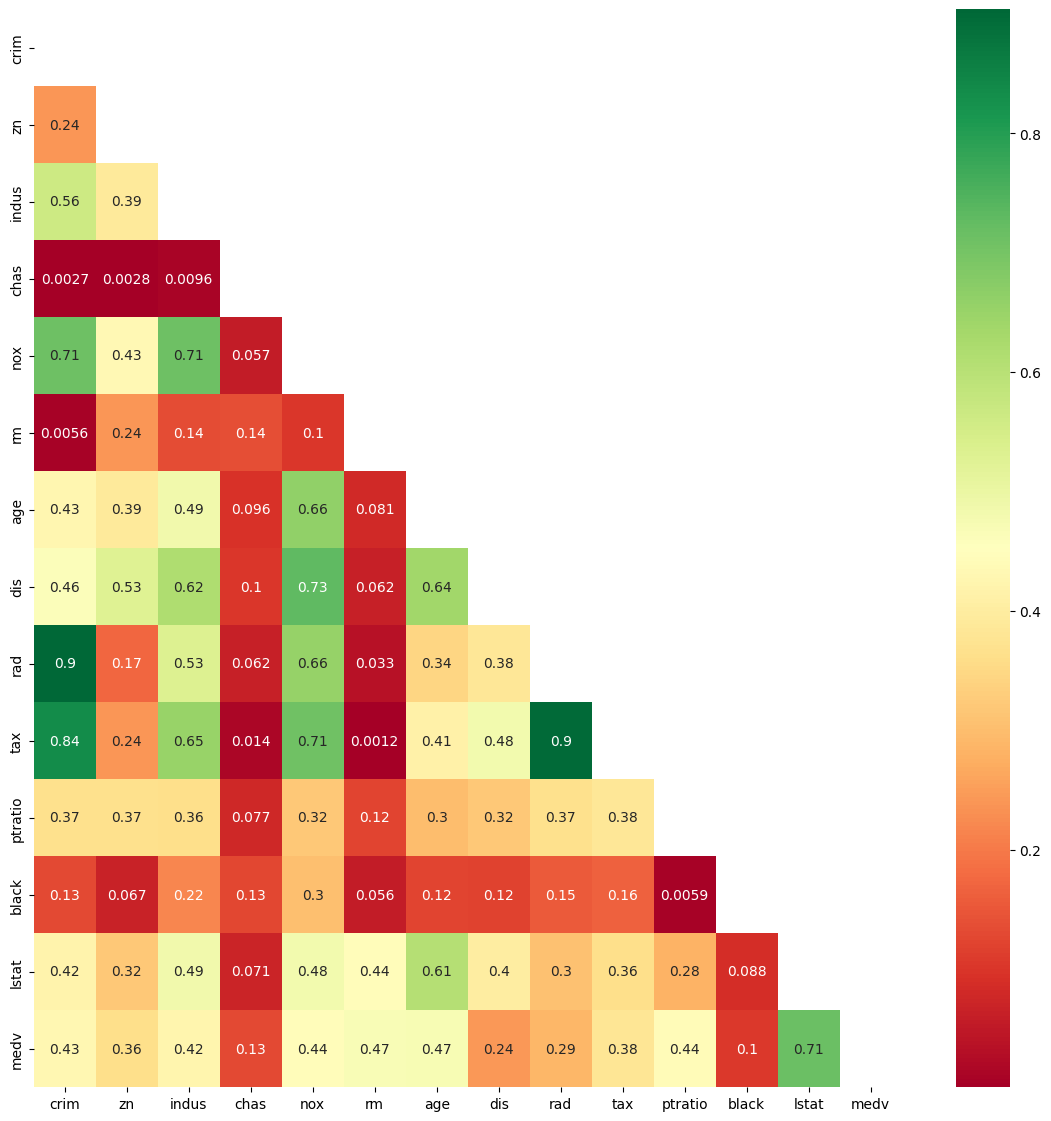

In [14]:
my_correlation(boston_df)

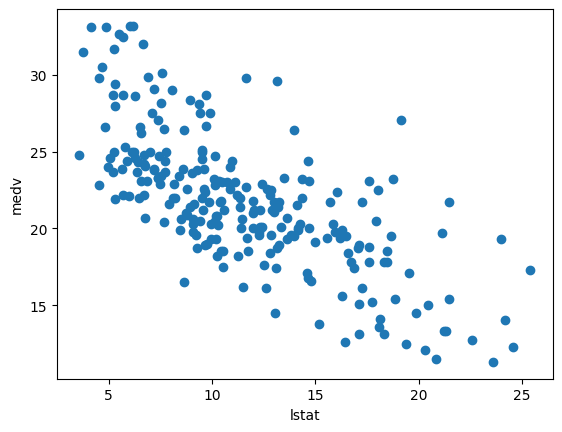

In [15]:
plt.scatter(y=boston_df.medv, x=boston_df.lstat)
plt.xlabel('lstat')
plt.ylabel('medv')
plt.show()

In [16]:
X = pd.DataFrame(boston_df.lstat)
y = boston_df.medv

X.head()

,lstat
0,9.88
1,9.22
2,9.97
3,21.45
4,9.43


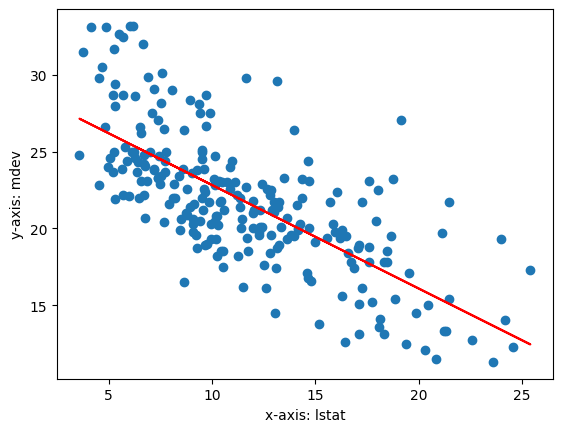

In [17]:
model = LinearRegression()
result = model.fit(X, y)

plt.scatter(x=X, y=y)
plt.xlabel('x-axis: lstat')
plt.ylabel('y-axis: mdev')

predictions = result.intercept_ + result.coef_ * X
plt.plot(X, predictions, '-', c='red')

In [18]:
'''Result is not bad We can see from the scatter that there is a tendency. However, points are not super close to the line
To go further, We will create a function and loop on all the columns to see if we see something, even if the correlation heat map wasn't great'''

"Result is not bad We can see from the scatter that there is a tendency. However, points are not super close to the line\nTo go further, We will create a function and loop on all the columns to see if we see something, even if the correlation heat map wasn't great"

In [19]:
columns = list(boston_df.columns)
columns.remove('medv')
columns

['crim',
 'zn',
 'indus',
 'chas',
 'nox',
 'rm',
 'age',
 'dis',
 'rad',
 'tax',
 'ptratio',
 'black',
 'lstat']

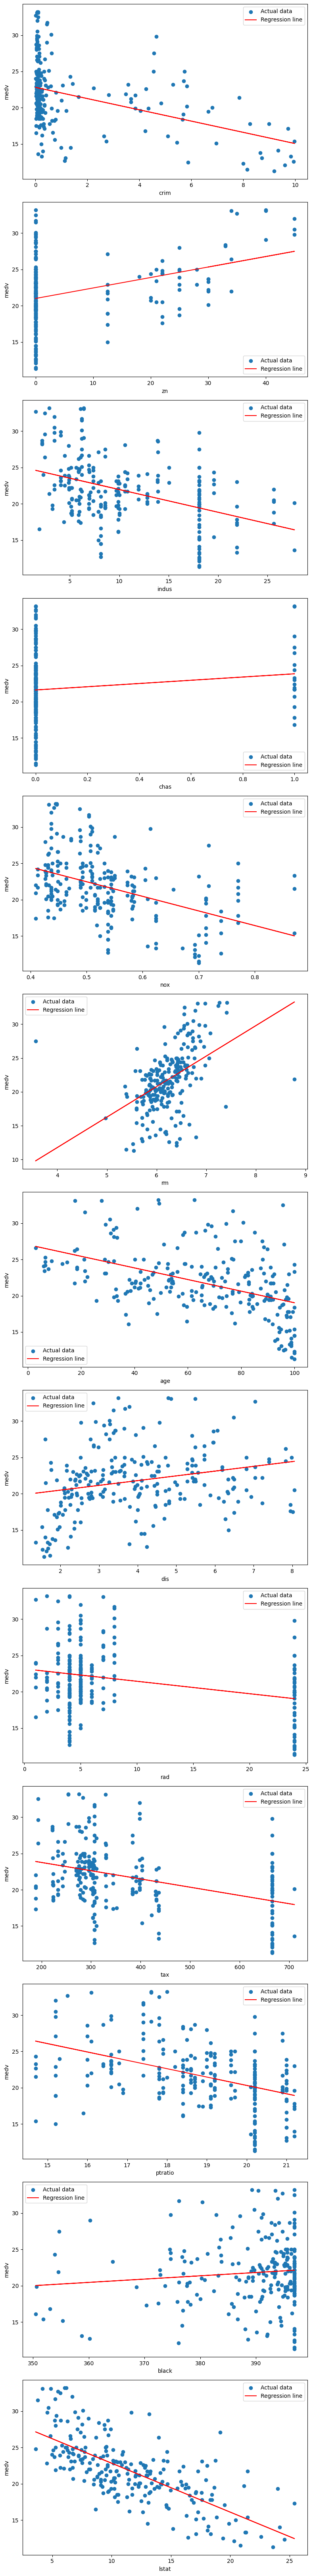

In [20]:
model = LinearRegression()
y = boston_df.medv
fig, axis = plt.subplots(nrows=len(columns), ncols=1, figsize=(8, 5 * len(columns)))

for i, column in enumerate(columns):
    y = boston_df["medv"]
    X = pd.DataFrame(boston_df[column])
    
    result = model.fit(X, y)

    axis[i].scatter(x=X, y=y, label='Actual data')
    axis[i].set_xlabel(f'{column}')
    axis[i].set_ylabel('medv')

    predictions = result.predict(X)
    axis[i].plot(X, predictions, '-', c='red', label='Regression line')
    axis[i].legend()

plt.tight_layout()
plt.show()


### What do these plots tell you about the relationships between these variables and the prices of homes in Boston? Are these the relationships you expected to see in these variables?

In [21]:
# Your response here
'''As expected, none (execpt lstat) of the feature share a linear relationship with out target'''

'As expected, none (execpt lstat) of the feature share a linear relationship with out target'

### Make a heatmap of the remaining variables. Are there any variables that you did not consider that have very high correlations? What are they?

In [22]:
# Your response here
'''See above for correlation heat map'''

'See above for correlation heat map'

### Calculate Statistics
Calculate descriptive statistics for housing price. Include the minimum, maximum, mean, median, and standard deviation. 

In [23]:
# Your code here
boston_df.medv.describe()

count    239.000000
mean      21.788285
std        4.498836
min       11.300000
25%       19.300000
50%       21.700000
75%       24.050000
max       33.200000
Name: medv, dtype: float64

----

## Developing a Model

### Implementation: Define a Performance Metric
What is the performance meteric with which you will determine the performance of your model? Create a function that calculates this performance metric, and then returns the score. 

In [24]:
def performance_metric(y_true, y_predict):
    """ Calculates and returns the performance score between 
        true and predicted values based on the metric chosen. """
    # Your code here:
    
    score = r2_score(y_true, y_predict)
    return score

### Implementation: Shuffle and Split Data
Split the data into the testing and training datasets. Shuffle the data as well to remove any bias in selecting the traing and test. 

In [25]:
# Your code here
X = boston_df.drop('medv', axis = 1)
y = boston_df['medv']
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 0, test_size=0.15)

----

## Analyzing Model Performance
Next, we are going to build a Random Forest Regressor, and test its performance with several different parameter settings.

### Learning Curves
Lets build the different models. Set the max_depth parameter to 2, 4, 6, 8, and 10 respectively. 

In [28]:
# Five separate RFR here with the given max depths

my_depth = [2,4,6,8,10]

for depth in my_depth:
    forest = RandomForestRegressor(n_estimators=10, max_depth=depth, random_state=1)
    forest.fit(X_train, y_train)
    print(f'Train score for depth = {depth} is {forest.score(X_train, y_train)}')
    print(f'test score for depth = {depth} is {forest.score(X_test, y_test)}')
    print()

Train score for depth = 2 is 0.6334244063115844
test score for depth = 2 is 0.7219443362243001

Train score for depth = 4 is 0.7983251446503024
test score for depth = 4 is 0.7866059264364306

Train score for depth = 6 is 0.8728285098903139
test score for depth = 6 is 0.7798936110934331

Train score for depth = 8 is 0.9143385206785805
test score for depth = 8 is 0.8050130511702518

Train score for depth = 10 is 0.92803117428056
test score for depth = 10 is 0.8135355052076829



Now, plot the score for each tree on the training set and on the testing set.

In [ ]:
# Produce a plot with the score for the testing and training for the different max depths

What do these results tell you about the effect of the depth of the trees on the performance of the model?

In [ ]:
# Your response here
# Even if from 6 to 10 we do not have much improvement, we can see that the more depth we have, the better our score is

### Bias-Variance Tradeoff
When the model is trained with a maximum depth of 1, does the model suffer from high bias or from high variance? How about when the model is trained with a maximum depth of 10? Check out this article before answering: https://towardsdatascience.com/understanding-the-bias-variance-tradeoff-165e6942b229

In [ ]:
# Your response here
# When the model is trained with a depth of 1, it is suffering of high bias. Both training and test data are having low score.

# With a depth of 10, I don't know if we are suffering from high variance, but we are definetly slightly overfitting the model

### Best-Guess Optimal Model
What is the max_depth parameter that you think would optimize the model? Run your model and explain its performance.

In [31]:
# Your response here
depth = 5
forest = RandomForestRegressor(n_estimators=10, max_depth=depth, random_state=1)
forest.fit(X_train, y_train)
print(f'Train score for depth = {depth} is {forest.score(X_train, y_train)}')
print(f'test score for depth = {depth} is {forest.score(X_test, y_test)}')

Train score for depth = 5 is 0.8412997292486318
test score for depth = 5 is 0.7794592799393083


In [ ]:
'''I would say that the best parameter is 4:
We also see that 6 is a similar case as 10; and result is better with 10.
We see that 5 starts to overfit the model, and score on the test data isnt really better than 4
So I decided 4. We have a score of almost 80% and we can play with others parameters to improve it'''

### Applicability
*In a few sentences, discuss whether the constructed model should or should not be used in a real-world setting.*  
**Hint:** Some questions to answering:
- *How relevant today is data that was collected from 1978?*
- *Are the features present in the data sufficient to describe a home?*
- *Is the model robust enough to make consistent predictions?*
- *Would data collected in an urban city like Boston be applicable in a rural city?*

In [ ]:
# Your response here

'''
I don't think it would be relevant to build the model on data collected from 1978 to today. In fact, I think it would have a negative effect.
I think that maximum 3 years back is enough

I think the model is robust enought to make consistent prediction. Of course they are 100% correct and has to be analysed in the real world. We might be missing that a specific house is outstanding and takes the price up

Even in an other city similar to Boston the data would not be relevant. I think that has each problem need his own data covered by a sample of it
'''
